### Sentiment analysis is a machine learning technique that detects polarity (e.g. a positive or negative opinion) within text, whether a whole document, paragraph, sentence, or clause. Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.
sentiment analysis is becoming an essential tool to monitor and understand that sentiment

In [1]:
# important lib. for NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from textblob import TextBlob

In [2]:
# Read the data
text= pd.read_csv('E:/DATA SCI ASSI/text mining/Elon_musk.csv', encoding='unicode_escape')
text

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# check the Missing values
text.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

# Cleaning the data for NLP

In [3]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)
text['Product_Description'] =text.Text.apply(clean)

In [5]:
text.head()

,Unnamed: 0,Text,Product_Description
0,1,@kunalb11 Im an alien,im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...


In [5]:
# length # Find  count of wards , characters count in review clm
# used 'len' fuction for char_count= length 
text["characters count"]=text['Product_Description'].apply(len)

# Words count
text['Words_count']=text['Product_Description'].apply(lambda x:len(x.split()))

In [6]:
#Calculate the polarity
from textblob import TextBlob

def  get_polarity(text):
  textblob=TextBlob(str(text)) 
  pol=textblob.sentiment.polarity
  return pol

text['Polarity']=text['Product_Description'].apply(get_polarity)
text[['Product_Description','Polarity']]

,Product_Description,Polarity
0,im an alien,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,joerogan spotify great interview,0.800000
3,doge is underestimated,0.000000
4,teslacn congratulations tesla china for amazin...,0.275000
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.111111
1995,ppathole make sure to read ur terms amp condit...,0.500000
1996,teslagong ppathole samwise gamgee,0.000000
1997,ppathole altho dumb and dumber is,-0.375000


In [7]:
# Calculate subjectivity
def  get_subjectivity(text):
  textblob=TextBlob(str(text.encode("utf-8"))) 
  subj=textblob.sentiment.subjectivity
  return subj

text['subjectivity']=text['Product_Description'].apply(get_subjectivity)

In [9]:
text.columns

Index(['Unnamed: 0', 'Text', 'Product_Description', 'characters count',
       'Words_count', 'polarity', 'subjectivity'],
      dtype='object')

In [8]:
text[['characters count','Words_count','Polarity','subjectivity']].head(5)

,characters count,Words_count,Polarity,subjectivity
0,13,3,-0.250,0.750000
1,76,13,0.000,0.000000
2,32,4,0.800,0.750000
3,23,3,0.000,0.000000
4,100,17,0.275,0.366667


# Created Features

In [11]:
# Let summarize the newly created Features
text.describe()

,Unnamed: 0,characters count,Words_count,polarity,subjectivity
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1000.000000,64.733367,9.806903,0.127159,0.321145
std,577.205914,39.145905,6.485738,0.256249,0.322529
min,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,500.500000,29.000000,4.000000,0.000000,0.000000
50%,1000.000000,58.000000,9.000000,0.000000,0.300000
75%,1499.500000,104.000000,16.000000,0.250000,0.562798
max,1999.000000,139.000000,30.000000,1.000000,1.000000


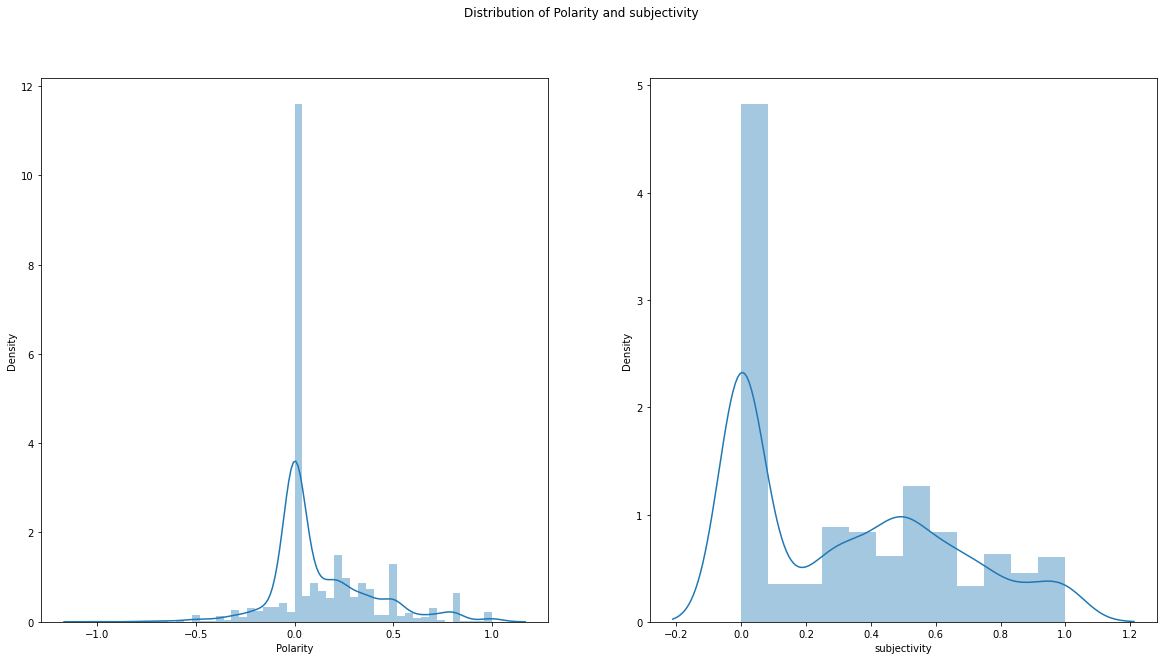

In [10]:
# Visualization polarity and subjectivity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.distplot(text['Polarity'])


plt.subplot(1,2,2)
sns.distplot(text['subjectivity'])
plt.suptitle('Distribution of Polarity and subjectivity')
plt.show()


In [13]:
text.columns

Index(['Unnamed: 0', 'Text', 'Product_Description', 'characters count',
       'Words_count', 'polarity', 'subjectivity'],
      dtype='object')

In Natural Language Processing (NLP), vectorization is the process of converting text data into numerical vectors that machine learning models can use. This method transforms unstructured text data into a structured format that's easier to analyze and manipulate

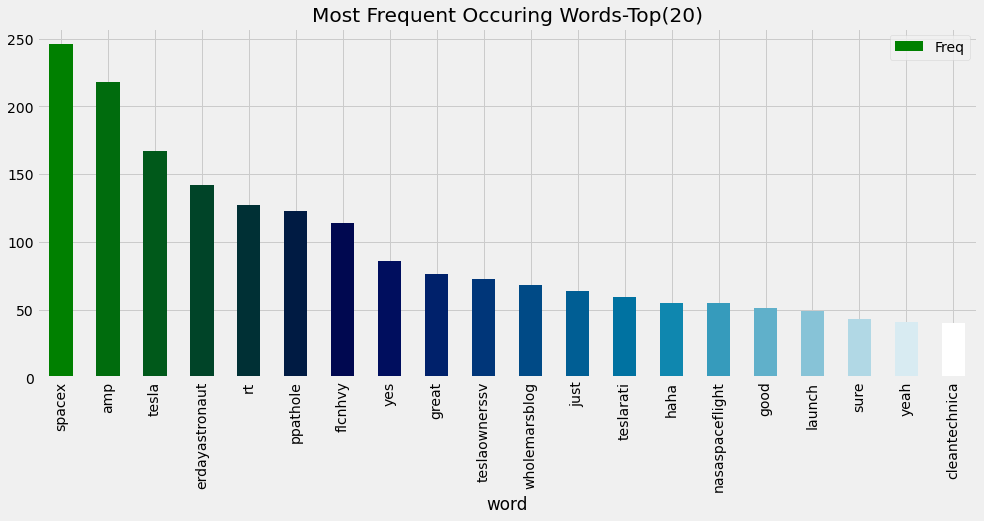

In [14]:
## Visualizing the Most Frequent Words top(20)
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words ='english')
words =cv.fit_transform(text.Product_Description)
sum_words =words.sum(axis=0)

words_freq=[(word,sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1],reverse=True)
frequency= pd.DataFrame(words_freq, columns=['word','Freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.head(20).plot(x='word',y='Freq',kind='bar',figsize=(15,6),color=color)
plt.title('Most Frequent Occuring Words-Top(20)')
plt.show()

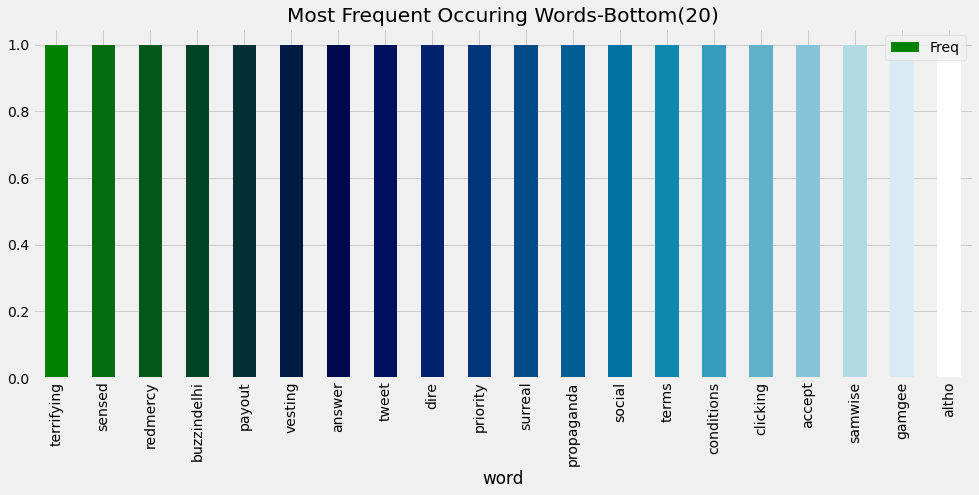

In [15]:
## Visualizing the Most Frequent Words Bottom(20)
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

cv=CountVectorizer(stop_words ='english')
words =cv.fit_transform(text.Product_Description)
sum_words =words.sum(axis=0)

words_freq=[(word,sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1],reverse=True)
frequency= pd.DataFrame(words_freq, columns=['word','Freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.tail(20).plot(x='word',y='Freq',kind='bar',figsize=(15,6),color=color)
plt.title('Most Frequent Occuring Words-Bottom(20)')
plt.show()

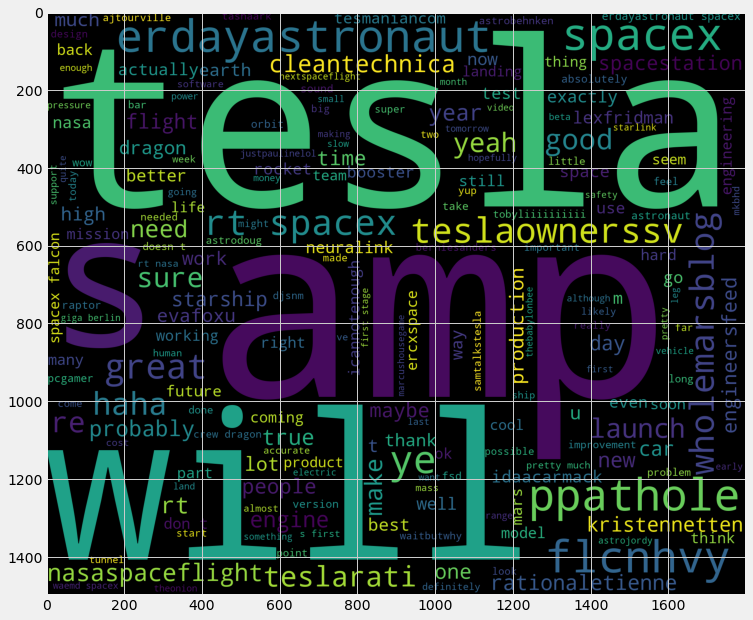

In [16]:
#wordcloud for entire corpus

string_Total = " ".join(text["Product_Description"])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

## Part of speech Tagging

Speech tagging in natural language processing (NLP) is the process of assigning a grammatical category to each word in a piece of text. This is also known as part-of-speech (POS) tagging. 

In [18]:
# NLP english language model of spacy library
import spacy
 # python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [19]:
text.columns

Index(['Unnamed: 0', 'Text', 'Product_Description', 'characters count',
       'Words_count', 'polarity', 'subjectivity'],
      dtype='object')

In [26]:
tweets=text[['Product_Description']]
tweets.head()

,Product_Description
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [29]:
tweets = [Product_Description.strip() for Product_Description in tweets.Product_Description] # remove both the leading and the trailing characters
tweets = [Product_Description for Product_Description in tweets if Product_Description]
# Joining the list into one string/text
text = ' '.join(tweets)
text
#no_punc = text.translate(str.maketrans('', '', string.punctuation))
#no_punc

'i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freewalletorg

In [30]:
#Punctuation
no_punc = text.translate(str.maketrans('', '', string.punctuation))

In [31]:
doc=nlp(no_punc)
# token and tag
for token in doc:
    print(token,token.pos_)


im PROPN
an DET
alien ADJ
idaacarmack NOUN
ray NOUN
tracing VERB
on ADP
cyberpunk NOUN
with ADP
hdr NOUN
is VERB
nextlevel ADJ
have AUX
you PRON
tried VERB
it PRON
joerogan NOUN
spotify VERB
great ADJ
interview NOUN
doge NOUN
is AUX
underestimated VERB
teslacn NOUN
congratulations NOUN
tesla VERB
china NOUN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADV
happy ADJ
new ADJ
year NOUN
of ADP
the DET
ox ADJ
frodo PROPN
was VERB
the DET
underdoge ADJ

 SPACE
all DET
thought VERB
he PRON
would AUX
fail VERB

 SPACE
himself PRON
most ADJ
of ADP
all DET
httpstcozgxjfdzzrm NOUN
owensparks NOUN
flcnhvy NOUN
  SPACE
haha NOUN
thanks NOUN
flcnhvy PUNCT
  SPACE
indeed ADV
tweets NOUN
definitely ADV
do AUX
not PART
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
most ADV
entertaining ADJ
outcome NOUN
is VERB
the DET
most ADV
likely ADV
givedirectly ADV
just ADV
sent VERB
some DET
just ADV
agree VERB
to PART
do VE

marcushousegame NOUN
tom PROPN
has VERB
some DET
great ADJ
stories NOUN
about ADP
experim ADJ
  SPACE
httpstcoteezkiwcmk X
rt PROPN
commercialcrew NOUN
launch NOUN
alert NOUN
  SPACE
nasa NOUN
and CCONJ
spacex NOUN
are AUX
targeting VERB
no DET
earlier ADV
than SCONJ
april PROPN
  SPACE
for ADP
the DET
launch NOUN
of ADP
the DET
second ADJ
crew NOUN
rotation NOUN
mis NOUN
erdayastronaut NOUN
tjcooney NOUN
lrocket NOUN
spacex NOUN
felixschlang NOUN
marcushousegame NOUN
he PRON
became VERB
a DET
big ADJ
fan NOUN
of ADP
methane NOUN
but CCONJ
was VERB
tjcooney NOUN
lrocket NOUN
spacex NOUN
felixschlang NOUN
marcushousegame NOUN
that DET
sounds VERB
correct ADJ
tom PROPN
certainly ADV
deserves VERB
a DET
lot NOUN
of ADP
cre NOUN
tjcooney NOUN
lrocket NOUN
spacex NOUN
felixschlang NOUN
marcushousegame NOUN
tom PROPN
is AUX
great ADJ
amp NOUN
was VERB
instrumental ADJ
in ADP
developing VERB
early ADJ
vers NOUN
ercxspace NOUN
smvllstvrs X
tw X
will AUX
be VERB
  SPACE
so SCONJ
it PRON
will A

mrbeastyt NOUN
i PRON
whistle VERB
dmcryan ADJ
crhm X
tesla X
cybertruck NOUN
doesnt PROPN
need VERB
a DET
garage NOUN
dmcryan NOUN
tesla NOUN
it PRON
will AUX
be VERB
awesome ADJ
owenshift NOUN
good ADJ
point NOUN
signalapp X
your PRON
serverside NOUN
code NOUN
is AUX
doing VERB
too ADV
much ADJ
wikipedia NOUN
happy ADJ
birthday NOUN
wikipedia NOUN
so ADV
glad ADJ
you PRON
exist VERB
theonion NOUN
guess NOUN
you PRON
been AUX
watching VERB
cobra NOUN
kai PROPN
superclusterhq X
  SPACE
fallout ADP
new ADJ
texas NOUN
benmezrich NOUN
only ADV
chuck VERB
norris NOUN
can AUX
divide VERB
by ADP
zero NUM
benmezrich NOUN
good ADJ
point NOUN
benmezrich X
the DET
thing NOUN
we PRON
call VERB
money NOUN
is VERB
just ADV
an DET
information NOUN
system NOUN
for ADP
labor NOUN
allocation NOUN


 SPACE
what PRON
actuall ADV
monty NOUN
python NOUN
is AUX
amazing ADJ
rationaletienne NOUN
tobyliiiiiiiiii X
erdayastronaut NOUN
they PRON
sure ADV
can AUX
twist VERB
the DET
knife NOUN
in ADP
that DET
sho

is AUX
real ADJ
destiny NOUN
destiny NOUN

 SPACE
no DET
escaping VERB

 SPACE
that SCONJ
for ADP
me PRON
all DET
tesla NOUN
cars NOUN
delivered VERB
in ADP
the DET
final ADJ
three NUM
days NOUN
of ADP
the DET
year NOUN
will AUX
get VERB
three NUM
months NOUN
of ADP
the DET
full ADJ
selfdriving NOUN
option NOUN
spacenewsinc NOUN
and CCONJ
mark ADJ
dankberg PROPN
this DET
action NOUN
is VERB
wack NOUN
not PART
dank VERB
rezazadeh NOUN
less ADJ
ashleevance NOUN
westworld NOUN
the DET
last ADJ
kingdom NOUN
show NOUN
is VERB
great ADJ
absolutely ADV
will AUX
be VERB
text NOUN
amp NOUN
visualization NOUN
but CCONJ
could AUX
add VERB
voice NOUN
too ADV
sfscentral ADJ
  SPACE
even ADV
cheese NOUN
is AUX
made VERB
of ADP
cake NOUN
karpathy NOUN
if SCONJ
they PRON
dont AUX
love VERB
us PRON
were NOUN
in ADP
deep ADJ
trouble NOUN
not PART
everything PRON
is AUX
made VERB
of ADP
cake NOUN
httpstcoomacmyqawx NOUN
chicagoglenn X
true ADJ
haha NOUN
such DET
a DET
weird ADJ
game NOUN
when ADV
you P

mission NOUN
docks NOUN
to ADP
the DET
spacestatio NOUN
nasaspaceflight NOUN
knock VERB
knock VERB
singing NOUN
telegram NOUN
lexfridman NOUN
carrying VERB
even ADV
more ADV
symbiotic ADJ
bacteria NOUN
  SPACE
trillion NUM
than SCONJ
cells NOUN
adamklotz NOUN
lexfridman NOUN
yes INTJ
lexfridman NOUN
we PRON
are AUX
mobile ADJ
cell NOUN
colonies NOUN
rt VERB
spacex NOUN
tracking NOUN
footage NOUN
from ADP
a DET
helicopter NOUN
of ADP
todays X
falcon NOUN
  SPACE
launch NOUN
off ADP
rt X
erdayastronaut X
theres INTJ
something PRON
genuinely ADV
magical ADJ
about ADP
seeing VERB
starship NOUN
  SPACE
in ADP
person NOUN
boca NOUN
chica ADJ
is AUX
beautiful ADJ
quiet ADJ
and CCONJ
serine NOUN
t NOUN
i PRON
m VERB
gespräch NOUN
mit VERB
mathias NOUN
döpfner NOUN
rt X
spacex VERB
dragon NOUN
separation NOUN
confirmed VERB
the DET
spacecraft NOUN
is AUX
on ADP
its PRON
way NOUN
to ADP
the DET
spacestation NOUN
autonomous ADJ
docking NOUN
tomorrow NOUN
at ADP
approximately ADV
rt X
spacex NOU

first ADJ
merlin NOUN
engine NOUN
design NOUN
was VERB
really ADV
bad ADJ
tbh NOUN
nothing PRON
worked VERB
well ADV
timmerenginerd X
jack NOUN
maybe ADV
i PRON
just ADV
love VERB
irony NOUN
haha INTJ
greenisclutch X
  SPACE
timmerenginerd X
jack NOUN
theyre INTJ
on ADP
their PRON
way NOUN
hopefully ADV
more ADJ
teslaquila PROPN
next ADJ
month NOUN
chrisgnsf NOUN
special ADJ
permission NOUN
received VERB
from ADP
stonecutters NOUN
guild NOUN
timmerenginerd NOUN
jack NOUN
fate NOUN
  SPACE
irony NOUN
jack NOUN
well ADV
said VERB
trylolli PROPN
maisiewilliams NOUN
  
 SPACE
httpstcouwerahxuev X
erdayastronaut NOUN
  SPACE
damn INTJ
thats INTJ
not PART
easy ADV
i PRON
spent VERB
quite DET
a DET
bit NOUN
of ADP
time NOUN
looking VERB
at ADP
russianukrainian ADJ
engines NOUN
theyre VERB
good ADJ
ppathole NOUN
michaelminalab NOUN
yes INTJ
rt INTJ
spacex NOUN
docking NOUN
confirmed VERB
 NOUN
crew NOUN
dragon NOUN
has AUX
arrived VERB
at ADP
the DET
spacestation NOUN
maisiewilliams NOUN
 

extremely ADV
bogus ADJ
is AUX
going VERB
on ADP
was AUX
tested VERB
for ADP
covid NOUN
four NUM
times NOUN
today NOUN
two NUM
tests NOUN
came VERB
back ADV
negative ADJ
two NUM
cam NOUN
burst NOUN
disk NOUN
worked VERB
so SCONJ
vehicle NOUN
appears VERB
to PART
be VERB
ok ADJ
well PROPN
have VERB
to PART
swap VERB
out ADP
at ADV
least ADV
one NUM
of ADP
the DET
engines NOUN
tobyliiiiiiiiii X
spacepadreisle X
  SPACE
maybe ADV
melted VERB
an DET
engine NOUN
preburner NOUN
or CCONJ
fuel VERB
hot ADJ
gas NOUN
manifold NOUN
whatev NOUN
we PRON
lost VERB
vehicle NOUN
pneumatics NOUN
reason NOUN
unknown ADJ
at ADP
present ADJ
liquid ADJ
oxygen NOUN
header NOUN
tank NOUN
pressure NOUN
is VERB
risin NOUN
drphiltill X
rt X
teslarati PROPN
tesla NOUN
tops VERB
list NOUN
of ADP
s PROPN
most ADV
attractive ADJ
employers NOUN
for ADP
us PRON
engineering NOUN
students NOUN
astronauts NOUN
fly VERB
to ADP
spacestation NOUN
on ADP
sat ADJ
night NOUN
from ADP
cape NOUN
first ADV
operational ADJ
flig

this DET
update NOUN
addressed VERB
several ADJ
issu NOUN
teslatino NOUN
thanks NOUN
to ADP
a DET
great ADJ
autopilotai NOUN
team NOUN
working VERB
super ADV
hard ADV


 SPACE
doing VERB
neural PROPN
nets PROPN
without ADP
testing VERB
them PRON
again ADV
auchenberg PROPN
latency NOUN
will AUX
improve VERB
significantly ADV
soon ADV
bandwidth ADJ
too ADV
teslaownerssv ADJ
this DET
build NOUN
should AUX
be VERB
noticeably ADV
better ADJ
with ADP
interventions NOUN
rationaletienne NOUN
teslaownerssv NOUN
toadmeister NOUN
yes INTJ
teslaownerssv INTJ
toadmeister NOUN
ive AUX
spent VERB
more ADJ
than SCONJ
half DET
my PRON
life NOUN
in ADP
california PROPN
amp NOUN
love VERB
the DET
state NOUN
but CCONJ
frankly ADV
i PRON
think VERB
toadmeister ADJ
and CCONJ
  SPACE
sweden PROPN
is AUX
still ADV
right ADJ
with ADP
zero NUM
deaths NOUN
oct NOUN
tocnewyorkstate NOUN
true ADJ
also ADV
fewer ADJ
heart NOUN
attacks NOUN
as ADP
way ADV
easier ADJ
to PART
pump VERB
blood NOUN
in ADP
  SPACE
gr

sure ADJ
wholemarsblog X
kristennetten X
boringcompany NOUN
tesla NOUN
maybe ADV
a DET
month NOUN
or CCONJ
so ADV
some DET
finishing ADJ
touches NOUN
need VERB
to PART
be AUX
done VERB
on ADP
the DET
stations NOUN
kristennetten X
boringcompany NOUN
tesla NOUN
we PRON
simplified VERB
this DET
a DET
lot NOUN
its PROPN
basically ADV
just ADV
teslas NOUN
in ADP
tunnels NOUN
at ADP
this DET
point NOUN
playoverwatch ADJ
sweet ADJ
antonkanerva NOUN
yes INTJ
everything PRON
is VERB
slow ADJ
to ADP
a DET
phased VERB
array NOUN
antenna NOUN
lexfridman NOUN
nice ADJ
what PROPN
is AUX
love NOUN
baby NOUN
dont NOUN
hurt VERB
me PROPN
winston PROPN
churchill NOUN
playoverwatch X
twomad PROPN
or CCONJ
maybe ADV
  SPACE
weak ADJ
turrets NOUN
to PART
allow VERB
more ADJ
strategic ADJ
degrees NOUN
of ADP
freedom NOUN
playoverwatch X
twomad X
please INTJ
buff ADJ
torbs X
turret NOUN
twomad X
um INTJ
  SPACE
yes INTJ
teslaownerssv NOUN
i PRON
have AUX
goosebumps NOUN
  SPACE
merch NOUN
not PART
sur

or CCONJ
  SPACE
with ADP
an DET
optimized VERB
tanker NOUN
a DET
thesheetztweetz ADJ
waemd NOUN
spacex NOUN
spacexstarlink NOUN
wanationalguard NOUN
starlink NOUN
will AUX
be VERB
a DET
revolution NOUN
in ADP
connectivity NOUN
esp ADV
wholemarsblog NOUN
mkbhd NOUN
yeah INTJ
adlanbogatyryov X
erdayastronaut NOUN
nasaspaceflight NOUN
bocachicagal ADJ
thefavoritist NOUN
great ADJ
letter NOUN
it PRON
will AUX
be VERB
increasingl ADJ
erdayastronaut NOUN
nasaspaceflight NOUN
bocachicagal ADJ
thefavoritist NOUN
the DET
ship NOUN
rings NOUN
are AUX
thicker ADJ
than SCONJ
they PRON
need VERB
to PART
be VERB
for ADP
mkbhd NOUN
its PROPN
nextlevel ADJ
officialalishap NOUN
flcnhvy NOUN
tesla NOUN
glad ADJ
to PART
hear VERB
your PRON
mom NOUN
is AUX
ok ADJ
zshauladventure X
nasakennedy NOUN
ulalaunch NOUN
spacex INTJ
natreconofc NOUN
good ADJ
to PART
see VERB
inspiring ADJ
for ADP
future NOUN
of ADP
space NOUN
somiteslagirl NOUN
  SPACE
futurejurvetson ADJ
cfsenergy NOUN
cupplasma NOUN
mit VERB
t

neural ADJ
net ADJ
training NOUN
not PART
a DET
idaacarmack NOUN
tesla NOUN
you PRON
really ADV
want VERB
waypoints NOUN
this DET
much ADJ
idaacarmack NOUN
for ADP
dojo NOUN
were NOUN
betting NOUN
on ADP
  SPACE
with ADP
floating VERB
floating VERB
point NOUN
essentially ADV
truncating VERB
mostly ADV
zeroes NOUN
wholemarsblog NOUN
yes INTJ
wholemarsblog INTJ
yes INTJ
wholemarsblog PROPN
therell PROPN
be VERB
lots NOUN
of ADP
green ADJ
space NOUN
around ADP
factory NOUN
but CCONJ
building VERB
itself PRON
is VERB
continuous ADJ
the DET
open ADJ
areas NOUN
  SPACE
httpstcorabjkrtqlw X
savedtesla X
  SPACE
shaped VERB
like ADP
a DET
diamond NOUN
amp NOUN
aligned VERB
on ADP
true ADJ
north NOUN
a DET
prior ADJ
track NOUN
record NOUN
of ADP
exceptional ADJ
achievement NOUN
in ADP
engineering NOUN
is AUX
required VERB
but CCONJ
no DET
prior ADJ
experience NOUN
working VERB
on ADP
  SPACE
httpstcowzaddnxmid NOUN
if SCONJ
you PRON
feel VERB
neuralink NOUN
might AUX
have AUX
incorrectly 

like VERB
c INTJ
because SCONJ
it PRON
avoids VERB
class NOUN
warfare NOUN
ppathole NOUN
ieeespectrum NOUN
neuralink NOUN
a DET
nightcap NOUN
would AUX
probably ADV
work VERB
best ADV
ieeespectrum NOUN
neuralink NOUN
pretty ADV
much ADV
tesmaniancom X
good ADJ
summary NOUN
conceptual ADJ
telepathy ADJ
rt NOUN
waitbutwhy NOUN
if SCONJ
you PRON
ever ADV
fantasize VERB
about ADP
having AUX
been VERB
an DET
  SPACE
engineer NOUN
working VERB
in ADP
edisons X
lab NOUN
apply VERB
to ADP
work NOUN
at ADP
neuralink NOUN
ahem NOUN
  SPACE
starting VERB
soon ADV
all PROPN
of ADP
physics NOUN
is AUX
either CCONJ
impossible ADJ
or CCONJ
trivial ADJ
it PRON
is AUX
impossible ADJ
until ADP
you PRON
understand VERB
it PRON
and CCONJ
then ADV
it PRON
becomes VERB
trivial PROPN
e X
rutherford X
flcnhvy NOUN
giant ADJ
gap NOUN
between ADP
experimental ADJ
medical ADJ
device NOUN
for ADP
use NOUN
only ADV
in ADP
patients NOUN
with ADP
extreme ADJ
medical ADJ
problems NOUN
amp ADP
wid NOUN
tobyliiiiii

through ADP
deep ADJ
space NOUN
httpstcopcybhfpuad X
natgeo X
must AUX
be VERB
aliens NOUN
yes INTJ
rgvaerialphotos NOUN
spacex NOUN
erdayastronaut NOUN
this DET
little ADJ
spit NOUN
of ADP
dirt NOUN
will AUX
take VERB
us PRON
to PART
mars VERB
jwangark NOUN
humans NOUN
are AUX
swiftly ADV
becoming VERB
a DET
small ADJ
percentage NOUN
of ADP
total ADJ
compute NOUN
erdayastronaut NOUN
programmerdude NOUN
max NOUN
demonstrated VERB
raptor NOUN
thrust NOUN
is AUX
  SPACE
tons NOUN
amp NOUN
min NOUN
is AUX
  SPACE
tons NOUN
so ADV
theyre INTJ
actually ADV
adamblitzer NOUN
levie NOUN
justpaulinelol NOUN
nasaspaceflight NOUN
thats X
engine NOUN
sn NOUN
were PROPN
building VERB
  SPACE
of ADP
the DET
ship NOUN
nasaspaceflight X
  SPACE
is VERB
about ADJ
to PART
be AUX
tested VERB
amp NOUN
has VERB
several ADJ
upgrades NOUN
over ADP
  SPACE
bar NOUN
engine NOUN
for ADP
reference NOUN
  SPACE
bar NOUN
on ADP
r NOUN
raptor NOUN
engine NOUN
just ADV
reached VERB
  SPACE
bar NOUN
chamber NOUN
p

will AUX
be VERB
much ADV
wider ADJ
amp NOUN
taller ADJ
 X
like ADP
falcon NOUN
bu PROPN
flcnhvy NOUN
progress NOUN
is AUX
accelerating VERB
rt ADJ
nasaspaceflight NOUN
launch NOUN
starship NOUN
  SPACE
has AUX
launched VERB
on ADP
a DET
  SPACE
meter NOUN
test NOUN
hop NOUN
at ADP
spacex X
boca NOUN
chica X


 SPACE
under ADP
the DET
power NOUN
of ADP
raptor NOUN
   SPACE
h X
sciguyspace NOUN
exactly ADV
mars NOUN
is AUX
looking VERB
real ADJ
trevormahlmann NOUN
possible ADJ
flight NOUN
in ADP
  SPACE
mins NOUN
erdayastronaut NOUN
most ADV
likely ADV
flcnhvy X
  SPACE
cleantechnica X
true ADJ
cleantechnica NOUN
highly ADV
likely ADV
down ADP
the DET
road NOUN
cleantechnica NOUN
true ADJ
fact NOUN
nasaspaceflight X
scrubbed VERB
for ADP
the DET
day NOUN
a DET
raptor NOUN
turbopump NOUN
spin NOUN
start AUX
valve VERB
didnt X
open ADJ
triggering VERB
an DET
automatic ADJ
abo ADJ
  SPACE
httpstcoqddlnxfgjg X
erdayastronaut NOUN
im PROPN
in ADP
the DET
boca NOUN
control NOUN
room NOUN


ppathole NOUN
maureendowd NOUN
ring NOUN
of ADP
fire NOUN
iliketeslas NOUN
pjhornak NOUN
randyvegetables NOUN
i PRON
know VERB
congratulations NOUN
to ADP
the DET
people NOUN
of ADP
bolivia NOUN
ppathole NOUN
maureendowd VERB
the DET
song NOUN
i PRON
whistle VERB
most ADV
is AUX
strangers NOUN
in ADP
the DET
night NOUN
randyvegetables VERB
some DET
of ADP
whom PRON
seriously ADV
think VERB
tesla PROPN
toppled VERB
the DET
bolivian ADJ
govt NOUN
sigh NOUN
maureendowd VERB
great ADJ
song NOUN
karaswisher NOUN
maureendowd NOUN
elon NOUN
haha NOUN
thanks NOUN
kara NOUN
erikmaza NOUN
maureendowd NOUN
for ADP
sure ADJ
thefavoritist NOUN
nasaspaceflight NOUN
bocachicagal ADJ
yeah INTJ
were NOUN
hunkering VERB
down ADP
here ADV
until ADP
the DET
hurricane NOUN
passes VERB
adolfomorenos NOUN
historyofarmani PROPN
exactly ADV
cool ADJ
model NOUN
  SPACE
review NOUN
by ADP
iamjamiefoxx NOUN
teslacn NOUN
tesla NOUN
will AUX
add VERB
a DET
power NOUN
lift NOUN
gate NOUN
at ADP
no DET
cost NOUN
han

this DET
thing NOUN
we PRON
call VERB
money PROPN
is AUX
just ADV
a DET
slow ADJ
lossy ADJ
amp NOUN
unsecure ADJ
database NOUN
for ADP
labor NOUN
allocati NOUN
nnalinas NOUN
bbcsciencenews NOUN
trying VERB
to PART
set VERB
a DET
good ADJ
example NOUN
haha INTJ
mars NOUN
needs VERB
people NOUN
gerberkawasaki VERB
great ADJ
work NOUN
by ADP
tesla NOUN
software NOUN
engineering NOUN
bbcsciencenews NOUN
population NOUN
collapse NOUN
is VERB
  SPACE
biggest ADJ
danger NOUN
to ADP
civilization NOUN
after ADP
ai VERB
imo ADJ
erdayastronaut NOUN
flcnhvy NOUN
spacex X
yeah INTJ
will AUX
take VERB
less ADJ
than SCONJ
a DET
minute NOUN
to PART
order VERB
on ADP
  SPACE
when ADV
it PRON
goes VERB
live ADJ
flcnhvy NOUN
spacex X
starlink NOUN
terminal NOUN
has VERB
motors NOUN
to PART
selforient VERB
for ADP
optimal ADJ
view NOUN
angle NOUN
no DET
expert NOUN
installer NOUN
required VERB
niksanae NOUN
ok INTJ
alexavoigt INTJ
wholemarsblog NOUN
erdayastronaut NOUN
thesheetztweetz ADJ
brycespacetech

In [34]:
# we want list of verb tokens

print('Varbs:',[token.text for token in doc if token.pos_=="VERB"])

Varbs: ['tracing', 'is', 'tried', 'spotify', 'underestimated', 'tesla', 'was', 'thought', 'fail', 'represent', 'is', 'sent', 'agree', 'do', 'getting', 'bought', 'be', 'has', 'seems', 'fixing', 'unlock', 'give', 'avoided', 'sucks', 'selected', 'launch', 'predict', 'ipo', 'don', 'needs', 'pass', 'sequestered', 'made', 'be', 'meant', 'be', 'be', 'intended', 'be', 'apply', 'manage', 'receives', 'take', 'missing', 'go', 'seem', 'appears', 'be', 'is', 'fixed', 'stack', 'improve', 'michaelhodapp', 'spoken', 'reflect', 'let', 'doge', 'come', 'is', 'have', 'look', 'texts', 'learned', 'mars', 'tell', 'read', 'grimezsz', 'heard', 'get', 'hang', 'sjm', 'redlineshifter', 'said', 'has', 'use', 'maneuvering', 'seem', 'have', 'launch', 'collect', 'explore', 'launches', 'orbit', 'shut', 'are', 'have', 'is', 'start', 'shut', 'needed', 'land', 'become', 'happen', 'were', 'try', 'pull', 'doge', 'be', 'own', 'is', 'amp', 'watch', 'filled', 'working', 'ensure', 'is', 'enables', 'dream', 'going', 'space', 'a

In [43]:
# we want list of NOUN tokens

Noun=('NOUN:',[token.text for token in doc if token.pos_=="NOUN"])
Noun

('NOUN:',
 ['idaacarmack',
  'ray',
  'cyberpunk',
  'hdr',
  'joerogan',
  'interview',
  'doge',
  'teslacn',
  'congratulations',
  'china',
  'execution',
  'year',
  'year',
  'httpstcozgxjfdzzrm',
  'owensparks',
  'flcnhvy',
  'haha',
  'thanks',
  'tweets',
  'realworld',
  'time',
  'allocation',
  'outcome',
  'clubhouse',
  'dogecoin',
  'lil',
  'toddler',
  'hodler',
  'issues',
  'sentencing',
  'bit',
  'thanks',
  'account',
  'astrojordy',
  'power',
  'wallet',
  'keys',
  'costs',
  'app',
  'nasa',
  'falcon',
  'elements',
  'gateway',
  'mission',
  'ajtourville',
  'rationaletienne',
  'adamklotz',
  'cash',
  'flow',
  'starlink',
  'rationaletienne',
  'adamklotz',
  'starlink',
  'amp',
  'endeavor',
  'rationaletienne',
  'adamklotz',
  'spacex',
  'chasm',
  'cash',
  'flow',
  'year',
  'idaacarmack',
  'cost',
  'ton',
  'carbon',
  'net',
  'value',
  'product',
  'price',
  'countries',
  'difference',
  'taxes',
  'amp',
  'shipping',
  'tobyliiiiiiiiii

In [1]:
# Perform Tokenization
# It is way of separating a piece of text into smaller units called Tokens.
# token help in understanding the context or Developing the model for the NLP.

import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

In [6]:
# example sentence_tokenize
data='hi i am krushna. today we will learn Text mining using python\java. you can learn python and data analysis here.'
d_tokens=nltk.sent_tokenize(data)
d_tokens

['hi i am krushna.',
 'today we will learn Text mining using python\\java.',
 'you can learn python and data analysis here.']

In [8]:
d_tokens[1]

'today we will learn Text mining using python\\java.'

In [56]:
# example word_tokenize
w_tokens=nltk.word_tokenize(data)
w_tokens

['hi',
 'i',
 'am',
 'krushna',
 '.',
 'today',
 'we',
 'will',
 'learn',
 'Text',
 'mining',
 'using',
 'python\\java',
 '.',
 'you',
 'can',
 'learn',
 'python',
 'and',
 'data',
 'analysis',
 'here',
 '.']

In [51]:
# Tokenizing the data
sen_tokens=nltk.sent_tokenize(text)
sen_tokens 

['i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freewalletor